# Finding the Optimum Machine Learning Model for Predicting Forest Fires

In this project I will be looking at the dataset from the UCI machine learning repository on forest fires. I will be looking at various machine learning models and see which one ideally predicts the extent of fire damage in forests accuractly. I will be starting off with a basic linear regression model and work my way to the most ideal model. This will help us predict how these features might predict future forest fires.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
fires = pd.read_csv('fires.csv')
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    object 
 4   day         517 non-null    object 
 5   FFMC        469 non-null    float64
 6   DMC         496 non-null    float64
 7   DC          474 non-null    float64
 8   ISI         515 non-null    float64
 9   temp        496 non-null    float64
 10  RH          487 non-null    float64
 11  wind        482 non-null    float64
 12  rain        485 non-null    float64
 13  area        517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


In [3]:
fires.head()

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


In [4]:
linear_model = LinearRegression()

Looks like we a considerable amount of missing data. Here's what the features represent and if there is missing data.

1. X : the x-axis spatial coordinates, no missing data
2. Y : the y-axis spatial coordinates, no missing data
3. month : the month, in string format, no missing data
4. day : the day, in string format, no missing format
5. FFMC : FFMC index from the FWI system: 18.7 to 96.20, continous, missing data
6. DMC : DMC index from the FWI system: 1.1 to 291.3, integer, missing data
7. DC : DC index from the FWI system: 7.9 to 860.6, continous, missing data
8. ISI : ISI index from the FWI system: 0.0 to 56.10, continous, missing data
9. temp : temperature: 2.2 to 33.30, continous, missing data
10. RH : relative humidity: 15.0 to 100, integer, missing data
11. wind : wind speed: 0.40 to 9.40, continous, missing data
12. rain : outside rain: 0.0 to 6.4, integer, missing data
13. area : the burned area of the forest: 0.00 to 1090.84, no missing data

for starters let's drop the unamed column and make the transform the month and date columns into numerical columns for better reading, also the area column looks skewed towards the 0.0, let's covert that column into a logarithimic scale to spread out the data.


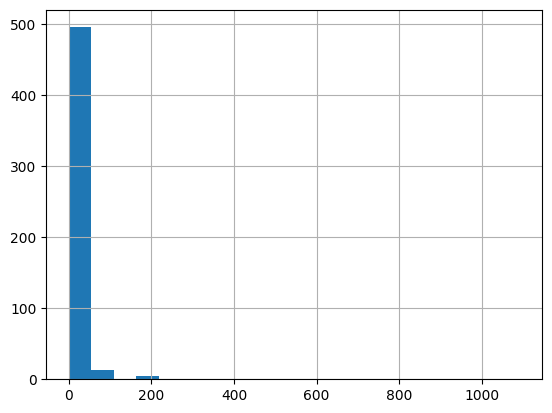

In [5]:
fires['area'].hist(bins=20)
plt.show()

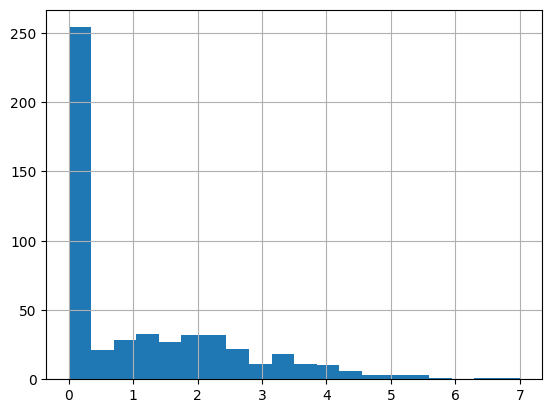

In [6]:
fires['area'] = np.log(fires['area']+1)
fires['area'].hist(bins=20)
plt.show()

In [7]:
fires.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
fires['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [9]:
fires['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

Let's use scikit-learn's ordinal encoder to make the columns numerical, since both month and days are in chronological form.

In [10]:
from sklearn.preprocessing import OrdinalEncoder

month_encoder = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
day_encoder = OrdinalEncoder(categories=[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']])

fires['month_encoded'] = month_encoder.fit_transform(fires[['month']])
fires['day_encoded'] = day_encoder.fit_transform(fires[['day']])

fires.drop(['month', 'day'], axis=1, inplace=True)

fires.head(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded
0,7,5,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0,2.0,4.0
1,7,4,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0,9.0,1.0
2,7,4,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0,9.0,5.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0,2.0,4.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0,2.0,6.0
5,8,6,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0,7.0,6.0
6,8,6,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0,7.0,0.0
7,8,6,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0,7.0,0.0
8,8,6,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0,8.0,1.0
9,7,5,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0,8.0,5.0


Now let's move onto the FFMC which is the fine fuel moisture code. This tells us a numeric rating of the moisture content of litter and other cured fine fuels, which tells us the relative ease of ignition and the flammability of fine fuel.

The DMC or duff moisture code is numeric rating of average moisture content of loosely compacted moisture layers of moderate depth.

The DC or drought code  is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

The ISI is the intial spread index is numeric rating of expected rate of fire spread. With is directly correalted with wind and FFMC.

Then wind, relative humditiy, rain and temprature all have missing data that we can cover with imputation.

Upon further research we can see that the FFMC, DMC, DC and ISI all are directly correalted with RH, wind, rain, and temprature.

For optimizing our model we need to avoid multicollinearity which can make it difficult to isolate the individual effects of each variable on the outocme. This can cause unstable or unreliable model estimates. Let's build a correlation matrix between these features and see what we get and then proceed.

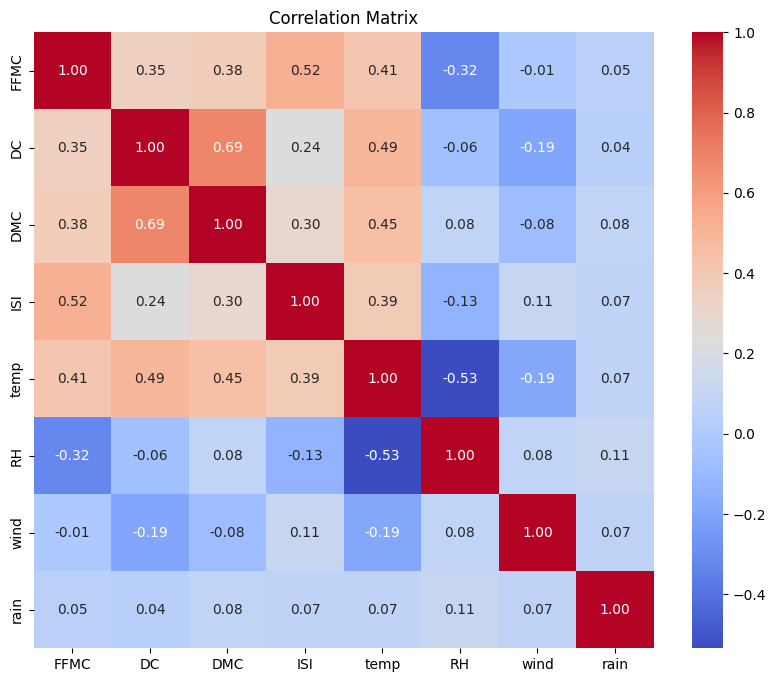

In [11]:
correlation_matrix = fires[['FFMC', 'DC', 'DMC', 'ISI', 'temp', 'RH', 'wind', 'rain']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

We can see that FFMC, DC, DMC and ISI are all highly correlated. Since we also known due to prior research that temprature, wind, rain, and RH all play a big factor in those variables and determine the intial coniditions it would make sense drop those columns for the analysis or use regularization like LASSO or Ridge.

I will first build a model without these features and then one model with these features but regularize it LASSO.

Let's impute all these features to cover for the missing data.

In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
fires_imputed = imputer.fit_transform(fires)
fires_imputed = pd.DataFrame(fires_imputed, columns=fires.columns)
fires_imputed.head(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded
0,7.0,5.0,86.2,26.20,94.30,5.1,15.54,51.0,6.70,0.0,0.0,2.0,4.0
1,7.0,4.0,90.6,62.26,669.10,6.7,18.00,33.0,0.90,0.0,0.0,9.0,1.0
2,7.0,4.0,90.6,43.70,558.24,6.7,14.60,33.0,1.30,0.0,0.0,9.0,5.0
3,8.0,6.0,91.7,33.30,77.50,9.0,8.30,97.0,4.00,0.2,0.0,2.0,4.0
4,8.0,6.0,89.3,51.30,102.20,9.6,11.40,99.0,4.48,0.0,0.0,2.0,6.0
5,8.0,6.0,92.3,85.30,488.00,14.7,22.20,29.0,5.40,0.0,0.0,7.0,6.0
6,8.0,6.0,92.3,88.90,495.60,8.5,24.10,27.0,3.10,0.0,0.0,7.0,0.0
7,8.0,6.0,91.5,145.40,608.20,10.7,8.00,86.0,2.20,0.0,0.0,7.0,0.0
8,8.0,6.0,91.0,129.50,692.60,7.0,13.10,63.0,5.40,0.0,0.0,8.0,1.0
9,7.0,5.0,92.5,88.00,698.60,7.1,22.80,40.0,4.00,0.0,0.0,8.0,5.0


Now let's check for outliers among the data using boxplots and see if we consider them or disregard it altogether.

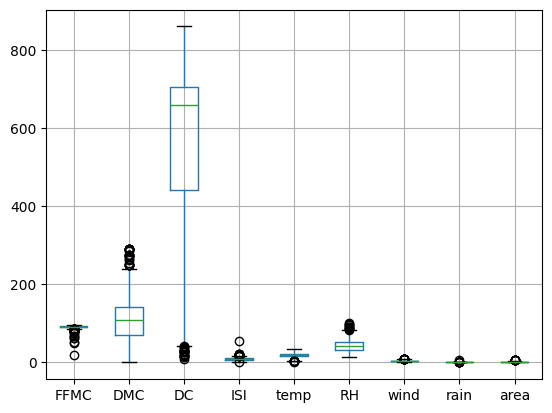

In [13]:
fires_imputed.boxplot(column=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
plt.show()

There seems to be some outliers in the data, let's calculate it to find out how many there are.

In [14]:
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for column in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']:
    outliers = calculate_outliers(fires_imputed, column)
    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in FFMC: 51
Number of outliers in DMC: 22
Number of outliers in DC: 20
Number of outliers in ISI: 23
Number of outliers in temp: 8
Number of outliers in RH: 10
Number of outliers in wind: 13
Number of outliers in rain: 8
Number of outliers in area: 8


We can see that there are some outliers in the data. Since all of these features are related to meterological data and we know that weather can be unpredictable we should not leave these outliers out of the model. We can deploy several techniques to reduce the influence of the outliers. Among them is winsorizing/capping the outliers, meaning replace the upper and lower outliers with the upper and lower percentile values, repectively. It gives a balanced approach and without disturbing the main bulk of the data.

In [15]:
from scipy.stats.mstats import winsorize

limits = (0.05,0.05)

for column in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']:
    fires_imputed[column] = winsorize(fires_imputed[column], limits=limits)
    outliers = calculate_outliers(fires_imputed, column)
    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in FFMC: 51
Number of outliers in DMC: 0
Number of outliers in DC: 0
Number of outliers in ISI: 0
Number of outliers in temp: 0
Number of outliers in RH: 0
Number of outliers in wind: 0
Number of outliers in rain: 0
Number of outliers in area: 0


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

We can ignore the warning, and looking at the outliers we can see that most have been dealt with except for the ones in FFMC. Let's use a boxplot and see if there is good improvment.

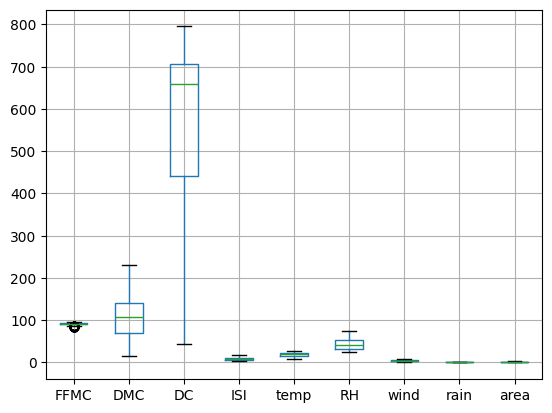

In [16]:
fires_imputed.boxplot(column=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
plt.show()

Looks good! Now let's strandardize the data.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
fires_imputed[columns_to_scale] = scaler.fit_transform(fires_imputed[columns_to_scale])

fires_imputed.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded
0,7.0,5.0,-1.766673,-1.419284,-1.868045,-1.008406,-0.654960,0.479867,1.629758,0.0,0.0,2.0,4.0
1,7.0,4.0,-0.184146,-0.805353,0.507428,-0.583624,-0.180662,-0.755783,-1.625700,0.0,0.0,9.0,1.0
2,7.0,4.0,-0.184146,-1.121342,0.049278,-0.583624,-0.836196,-0.755783,-1.625700,0.0,0.0,9.0,5.0
3,8.0,6.0,0.211486,-1.298405,-1.937474,0.027001,-2.050863,2.127400,0.002029,0.0,0.0,2.0,4.0
4,8.0,6.0,-0.651711,-0.991950,-1.835396,0.186294,-1.453170,2.127400,0.291403,0.0,0.0,2.0,6.0


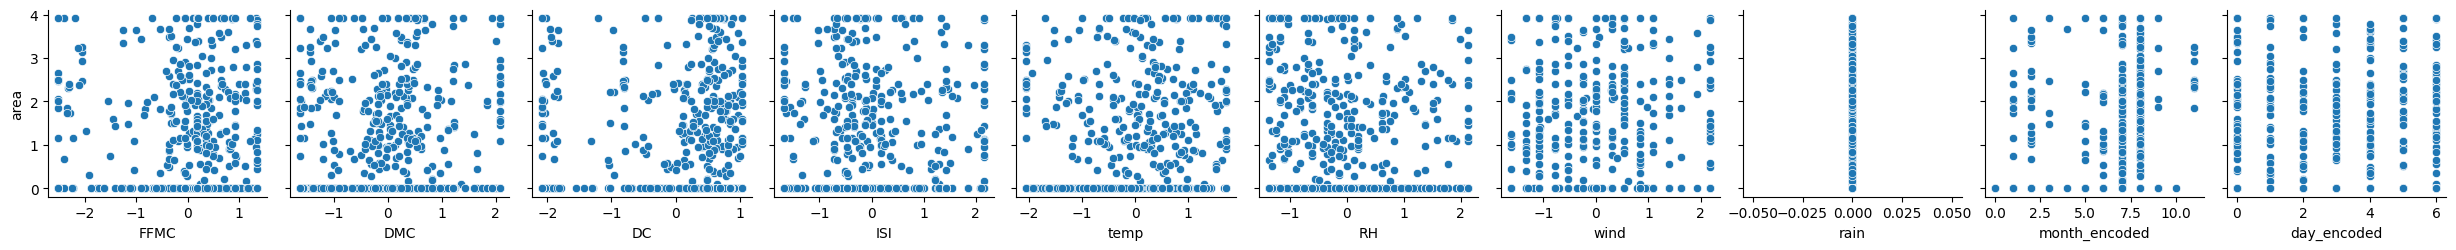

In [18]:
sns.pairplot(fires_imputed, x_vars = [ 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_encoded', 'day_encoded'], y_vars=['area'], kind ='scatter' )
plt.show()

Now we can do some subset selection to find the features than are most influential in the area (outcome) of the model. We are going to use sequential feature selection (forward and backward) to find the optimal number of features.

In [19]:
from sklearn.feature_selection import SequentialFeatureSelector

X = fires_imputed[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_encoded', 'day_encoded']]
y = fires_imputed['area']

linear_model = LinearRegression()

for n in range(1, 7):
    sfs = SequentialFeatureSelector(linear_model, n_features_to_select=n, direction='forward')
    sfs.fit(X, y)
    selected_features = sfs.get_feature_names_out()
    print(f"Number of selected features: {n}")
    print(selected_features)
    print()

Number of selected features: 1
['rain']

Number of selected features: 2
['rain' 'month_encoded']

Number of selected features: 3
['wind' 'rain' 'month_encoded']

Number of selected features: 4
['FFMC' 'wind' 'rain' 'month_encoded']

Number of selected features: 5
['FFMC' 'wind' 'rain' 'month_encoded' 'day_encoded']

Number of selected features: 6
['FFMC' 'RH' 'wind' 'rain' 'month_encoded' 'day_encoded']



Now let's try backward selection

In [20]:
linear_model = LinearRegression()

for n in range(1, 7):
    sfs = SequentialFeatureSelector(linear_model, n_features_to_select=n, direction='backward')
    sfs.fit(X, y)
    selected_features = sfs.get_feature_names_out()
    print(f"Number of selected features: {n}")
    print(selected_features)
    print()

Number of selected features: 1
['rain']

Number of selected features: 2
['wind' 'rain']

Number of selected features: 3
['DC' 'wind' 'rain']

Number of selected features: 4
['FFMC' 'DC' 'wind' 'rain']

Number of selected features: 5
['FFMC' 'DC' 'wind' 'rain' 'day_encoded']

Number of selected features: 6
['FFMC' 'DC' 'RH' 'wind' 'rain' 'day_encoded']



Let's perform a AIC calculation to find the optimum number of features.

In [21]:
!pip install statsmodels
import statsmodels.api as sm
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector

X = fires_imputed[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_encoded', 'day_encoded']]  # Features
y = fires_imputed['area']  # Target variable

best_n_features = 0
best_aic = np.inf
best_direction = ''
best_features = []

for n in range(1, len(X.columns)):
    for direction in ['forward', 'backward']:
        sfs = SequentialFeatureSelector(linear_model, n_features_to_select=n, direction=direction)
        sfs.fit(X,y)

        selected_features = sfs.get_feature_names_out()
        X_selected = X[selected_features]
        model = sm.OLS(y, sm.add_constant(X_selected)).fit()
        aic = model.aic

        if aic < best_aic:
            best_n_features = n
            best_aic = aic
            best_direction = direction
            best_features = selected_features

print("Best number of features:", best_n_features)
print("Best AIC:", best_aic)
print("Best direction:", best_direction)
print("Selected features:", best_features)

Best number of features: 3
Best AIC: 1724.7080348235197
Best direction: forward
Selected features: ['wind' 'rain' 'month_encoded']


Using the AIC criterion we can see that best number features is 3, with wind, rain and month_encoded as the primary features. This is still a linear model at heart and some componenets in the data may have non-linear relationships. This is where I am going to introduce LASSO and Ridge regression to make another model which we can use in K-fold cross validation.

In [22]:
from sklearn.linear_model import LassoCV, RidgeCV

X = fires_imputed[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_encoded', 'day_encoded']]  # Features
y = fires_imputed['area']

ridge = RidgeCV(alphas = np.linspace(1,10000, num = 1000))
lasso = LassoCV(alphas = np.linspace(1,10000, num = 1000))

ridge.fit(X,y)
lasso.fit(X,y)

print(f"Ridge alpha: {ridge.alpha_}")
print(f"Lasso alpha: {lasso.alpha_}")

print(f'Ridge Coeffiecients: {ridge.coef_}')
print(f'Lasso Coeffiecients: {lasso.coef_}')

Ridge alpha: 1662.4954954954956
Lasso alpha: 10000.0
Ridge Coeffiecients: [-9.61625313e-03  7.69376697e-03  5.48934439e-04 -5.70687264e-03
  5.96934329e-03 -9.27821571e-03  2.25607620e-02  0.00000000e+00
  3.91019640e-02  9.33670155e-05]
Lasso Coeffiecients: [-0.  0.  0. -0.  0. -0.  0.  0.  0. -0.]


The value for alpha in the LASSO model seems to be on the extreme end, which suggest the model may trying hard to not overfit the data, causing an aggresive reduction of the LASSO coeffiecients to 0 or very close to 0 (virtually 0). This might indicate multicollinearity. We know that these features can be correlated heavily in this case a Ridge model would be better, which is what I intend to use in the K-fold cross validation method.

Let's try building a polynomial or spline model before our validation method.  

In [23]:
from sklearn.preprocessing import SplineTransformer

degrees = [2,3,4,5]
n_knots = [2,3,4,5]

best_degree = None
best_n_knots = None
best_score = -1

for degree in degrees:
    for n_knot in n_knots:
        spline = SplineTransformer(degree=degree, n_knots=n_knot)
        X_spline = spline.fit_transform(X)
        spline_model = LinearRegression()
        spline_model.fit(X_spline, y)
        score = spline_model.score(X_spline, y)
        if score > best_score:
            best_score = score
            best_degree = degree
            best_n_knots = n_knot

print(f'Best degree: {best_degree}')
print(f'Best n_knots: {best_n_knots}')
print(f'Best score: {best_score}')

Best degree: 5
Best n_knots: 5
Best score: 0.1409833324259665


Let's try out the polynomial model too.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [2,3,4,5]

best_degree = None
best_score = -1

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    score = poly_model.score(X_poly, y)
    if score > best_score:
        best_score = score
        best_degree = degree

print(f'Best degree: {best_degree}')
print(f'Best score: {best_score}')

Best degree: 4
Best score: 0.9690651156650634


In [25]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

Looking at the spline and polynomial models we can deduce that polynimial of degree 4 would be the best model between them. We will use our K-fold cross validation to this polynomial model to get the best result from all the models.

In [26]:
from sklearn.model_selection import cross_val_score

ridge_cv = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
poly_cv = cross_val_score(poly_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
forward_linear_cv = cross_val_score(linear_model, X[['wind', 'rain', 'month_encoded']], y, cv=5, scoring='neg_mean_squared_error') # based on the AIC score
reference_cv = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [27]:
print(f'reference_model, AVG_MSE: {np.mean(reference_cv)}, SD: {np.std(reference_cv)}')
print(f'forward_linear_model, AVG_MSE: {np.mean(forward_linear_cv)}, SD: {np.std(forward_linear_cv)}')
print(f'ridge_model, AVG_MSE: {np.mean(ridge_cv)}, SD: {np.std(ridge_cv)}')
print(f'poly_model, AVG_MSE: {np.mean(poly_cv)}, SD: {np.std(poly_cv)}')

reference_model, AVG_MSE: -2.089275785985764, SD: 0.8880832530734779
forward_linear_model, AVG_MSE: -1.8540050489538078, SD: 0.6808017938110257
ridge_model, AVG_MSE: -1.9602390563401553, SD: 0.8019178295016874
poly_model, AVG_MSE: -15226.024872209202, SD: 15080.707104862551


Lookig at the all the models, the linear model using forward selection and 3 features seems to perform the best with a averge mse of -1.85 and a standard deviation of about 0.68. The worst performing model was the polynomial model with average mse of -15226.02 and standard deviation of 15080.71, this may be due to extreme overfitting.

Now let's use the best model to calculate the predicted values. Then calculate the residuals of the model.

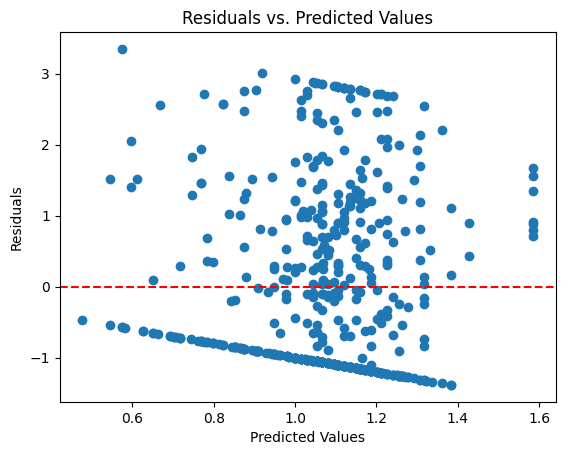

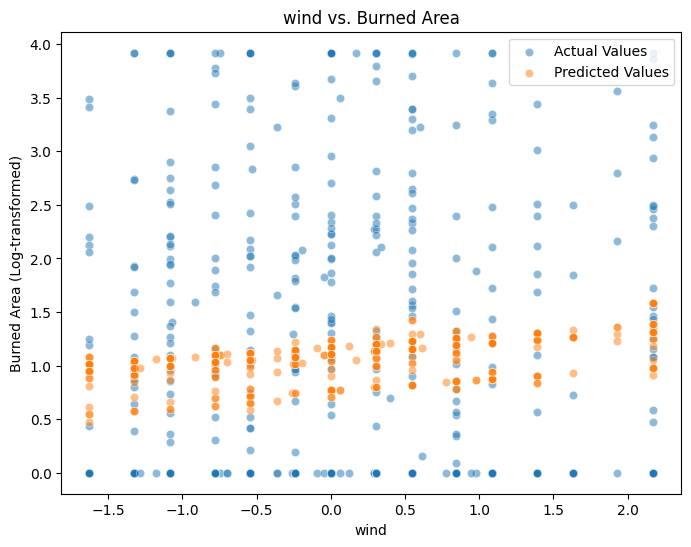

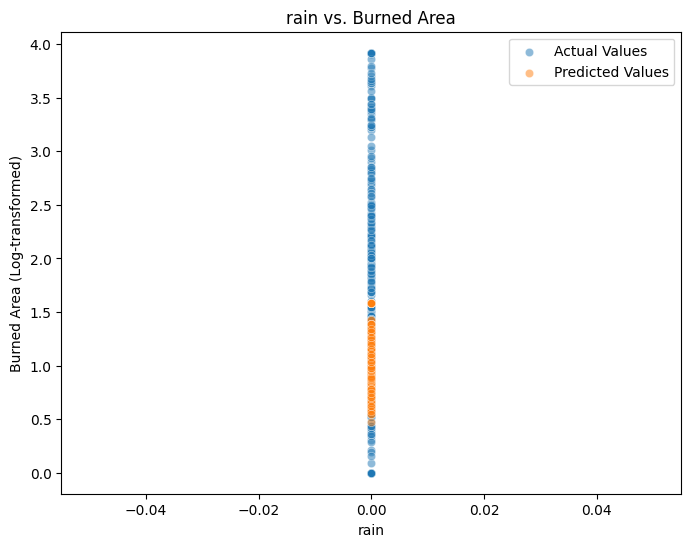

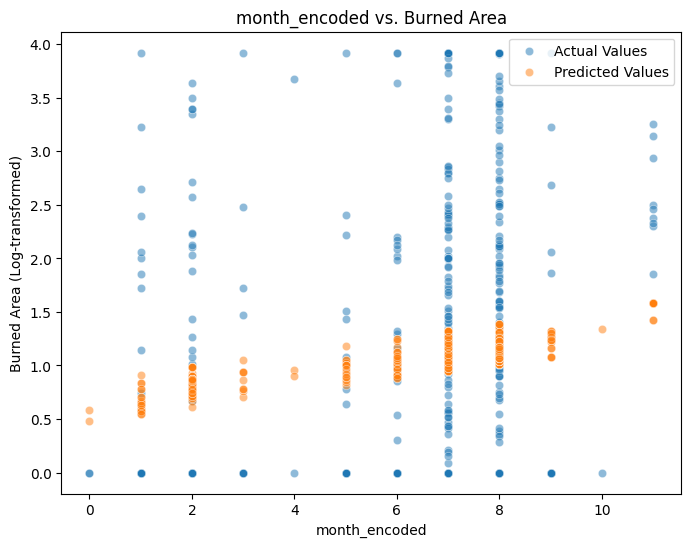

In [42]:
linear_model.fit(X[['wind', 'rain', 'month_encoded']], y)
y_pred = linear_model.predict(X[['wind', 'rain', 'month_encoded']])
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

relevant_features = ['wind', 'rain', 'month_encoded']
for feature in relevant_features:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.scatterplot(x=X[feature], y=y, label='Actual Values', alpha=0.5)  # Plot observed values
  sns.scatterplot(x=X[feature], y=y_pred, label='Predicted Values', alpha=0.5)  # Plot predicted values
  plt.xlabel(feature)
  plt.ylabel('Burned Area (Log-transformed)')  # Adjust y-axis label as needed
  plt.title(f'{feature} vs. Burned Area')  # Set title
  plt.legend()
  plt.show()

# Conclusion

Looking at the visulizations of the plot we can see that predicted values were much more conservative than the actual values. This maybe because the model is not trying overfit the data. Overall I would say that the model did a good job of predicting the outcome. Although I would like to add the fact that area is on a log scale and predictions are off by a factor of 2. This suggest that the model is overall not a great predictor. Even though we tried K-fold cross validation with 5 folds and we got a best score of -1.85 for average mean sqaured error with forward selection the overall results are not that great. The AIC value was the lowest therefore it was almost certian that a forward selection of features with a linear model will work better, than all the other models. The UCI respository says that this is a 'difficult regression task. Therefore I would recommend further fine tuning the model parameters or better feature engineering or even looking at new models. Some models we could look at are: random forests, SVM (support vector machines) or neural network based models.